# Introduction

- This notebook is a solution to the sample PAT exam for Machine Learning by GeeksForGeek
- The aim of this notebook is to predict whether a given person suffers from thyroid or not

## Table of Content

* [Importing Libraries](#import)
* [Loading Data](#load)
* [Data Preprocessing](#preprocess)
* [Exploratory Data Analysis](#eda)
* [Model Prediction and Evaluation](#model)

## <font color='green'>Importing Libraries<font><a class='anchor' id='import'>


In [1]:
#ignore warnings
import warnings
warnings.filterwarnings('ignore')

#standard Libraries
import pandas as pd
import numpy as np
import re

#visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (10,8)

from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV

#model for classification libraries
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

#model evaluation libraries
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report


## <font color='green'>Loading Data<font><a class='anchor' id='load'>


In [2]:
#as the txt file is seprated by spaces (\t)  providing it as delimeiter parameter
data = pd.read_csv('thyroid.txt',delimiter='\t')

In [3]:
data.head(10)

,age,sex,on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,lithium,goitre,tumor,hypopituitary,psych,TSH,T3,TT4,T4U,FTI,Thyroid
0,41,F,f,f,f,f,f,f,f,f,f,f,f,1.3,2.5,125,1.14,109,P
1,23,F,f,f,f,f,f,f,f,f,f,f,f,4.1,2,102,?,?,P
2,46,M,f,f,f,f,f,f,f,f,f,f,f,0.98,?,109,0.91,120,P
3,70,F,t,f,f,f,f,f,f,f,f,f,f,0.16,1.9,175,?,?,P
4,70,F,f,f,f,f,f,f,f,f,f,f,f,0.72,1.2,61,0.87,70,P
5,18,F,t,f,f,f,f,f,f,f,f,f,f,0.03,?,183,1.3,141,P
6,59,F,f,f,f,f,f,f,f,f,f,f,f,?,?,72,0.92,78,P
7,80,F,f,f,f,f,f,f,f,f,f,f,f,2.2,0.6,80,0.7,115,P
8,66,F,f,f,f,f,f,f,f,f,t,f,f,0.6,2.2,123,0.93,132,P
9,68,M,f,f,f,t,f,f,f,f,f,f,f,2.4,1.6,83,0.89,93,P


## Data Visualization

In [4]:
#checking the dataset info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3772 entries, 0 to 3771
Data columns (total 19 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   age                        3772 non-null   object
 1   sex                        3772 non-null   object
 2   on thyroxine               3772 non-null   object
 3   on antithyroid medication  3772 non-null   object
 4   sick                       3772 non-null   object
 5   pregnant                   3772 non-null   object
 6   thyroid surgery            3772 non-null   object
 7   I131 treatment             3772 non-null   object
 8   lithium                    3772 non-null   object
 9   goitre                     3772 non-null   object
 10  tumor                      3772 non-null   object
 11  hypopituitary              3772 non-null   object
 12  psych                      3772 non-null   object
 13  TSH                        3772 non-null   object
 14  T3      

In [5]:
data.columns

Index(['age', 'sex', 'on thyroxine', 'on antithyroid medication', 'sick',
       'pregnant', 'thyroid surgery', 'I131 treatment', 'lithium', 'goitre',
       'tumor', 'hypopituitary', 'psych', 'TSH', 'T3', 'TT4', 'T4U', 'FTI',
       'Thyroid'],
      dtype='object')

- According to above table all the columns are in object String format.
- We have 3772 records and total 19 columns(feature) including the label feature


The dataset contains thses information

- **'age':** Age of the patient in String format.
- **'sex':** Gender of the patient F for female and M for male.
- **'on thyroxine','on antithyroid medication', 'sick',**
- **'pregnant', 'thyroid surgery', 'I131 treatment', 'lithium', 'goitre',**
**'tumor', 'hypopituitary', 'psych'**: f for False , t for True. 
- **'TSH', 'T3', 'TT4', 'T4U', 'FTI'**: numeric values, contain missing when value is '?'.
- **'Thyroid'**: Target label. P= Present , A = absent.

## <font color='green'>Data Preprocessing<font><a class='anchor' id='preprocess'>


In [6]:
#Checking for duplicate records and droping them
data1 = data.drop_duplicates()

In [7]:
print(f'Orignial data shape : {data.shape}\nData shape after droping duplicates:{data1.shape}')

Orignial data shape : (3772, 19)
Data shape after droping duplicates:(3702, 19)


Lets check on columns one by one

In [8]:
data1.sex.value_counts()

F    2416
M    1137
?     149
Name: sex, dtype: int64

#? means we have missing data , Lets check the distribution of Gender

<Axes: title={'center': 'Distribution of Sex before preprocessing'}, xlabel='sex', ylabel='count'>

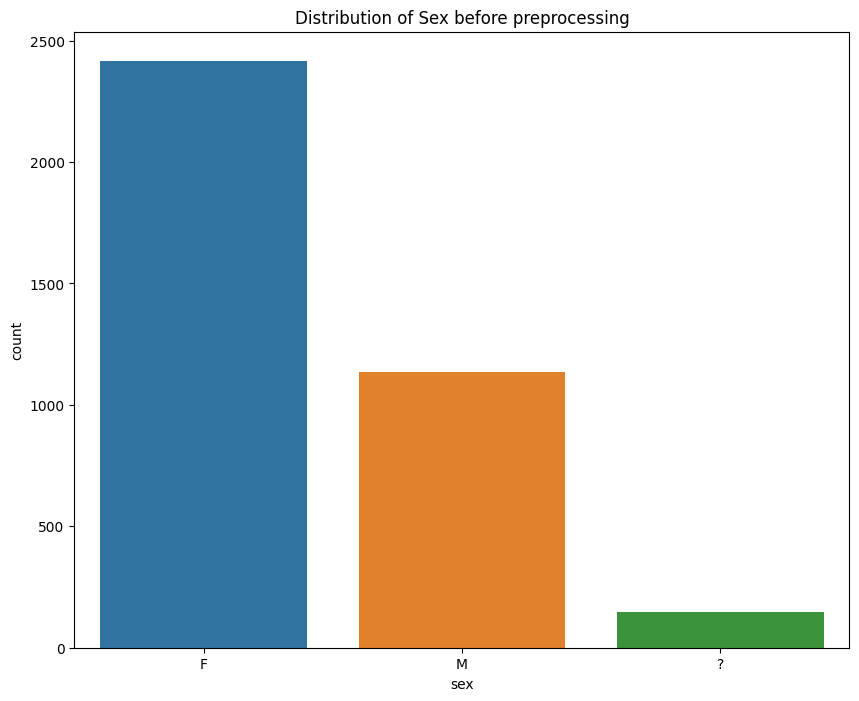

In [9]:
plt.title('Distribution of Sex before preprocessing')
sns.countplot(x=data1['sex'],data=data1)

There can be two ways of dealing with Null Values in the `sex` colume
 - Droping the rows with `?`
 - imputing it with the most frequent Value i.e F

 In this case as the data is already imbalanced, i will drop the values 

In [10]:
data2 = data1[data1['sex']!='?']
data2.sex.value_counts()

F    2416
M    1137
Name: sex, dtype: int64

I can see comlumns have data in frequent pattern so i would create a list of such cols to visulize is togehter

In [11]:
col_t_f_values = ['on thyroxine','on antithyroid medication', 'sick',
       'pregnant', 'thyroid surgery', 'I131 treatment', 'lithium', 'goitre',
       'tumor', 'hypopituitary', 'psych']
 

As observed the data for all this column is highly imblanced for now lets keep the columns and decide afterwards whether to remove or not

In [12]:
#mapping the data of f and t to 0 and 1
map_tf ={
    't':1,
    'f':0
} 
data3 = data2.copy() # creating deep copy of dataset for mapping

In [13]:
data3.head()

,age,sex,on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,lithium,goitre,tumor,hypopituitary,psych,TSH,T3,TT4,T4U,FTI,Thyroid
0,41,F,f,f,f,f,f,f,f,f,f,f,f,1.3,2.5,125,1.14,109,P
1,23,F,f,f,f,f,f,f,f,f,f,f,f,4.1,2,102,?,?,P
2,46,M,f,f,f,f,f,f,f,f,f,f,f,0.98,?,109,0.91,120,P
3,70,F,t,f,f,f,f,f,f,f,f,f,f,0.16,1.9,175,?,?,P
4,70,F,f,f,f,f,f,f,f,f,f,f,f,0.72,1.2,61,0.87,70,P


In [14]:
for col in col_t_f_values:
    if data3[col].dtype == 'object':
        data3[col] = data3[col].map(map_tf)



In [15]:
#mapping the sex column to a int column
sex_map = {
    'F': 1,
    'M': 0
}
data3['sex'] = data3['sex'].map(sex_map)
data3.head()

,age,sex,on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,lithium,goitre,tumor,hypopituitary,psych,TSH,T3,TT4,T4U,FTI,Thyroid
0,41,1,0,0,0,0,0,0,0,0,0,0,0,1.3,2.5,125,1.14,109,P
1,23,1,0,0,0,0,0,0,0,0,0,0,0,4.1,2,102,?,?,P
2,46,0,0,0,0,0,0,0,0,0,0,0,0,0.98,?,109,0.91,120,P
3,70,1,1,0,0,0,0,0,0,0,0,0,0,0.16,1.9,175,?,?,P
4,70,1,0,0,0,0,0,0,0,0,0,0,0,0.72,1.2,61,0.87,70,P


### preprocessing `Age` column 

In [16]:
data3.age.unique()

array(['41', '23', '46', '70', '18', '59', '80', '66', '68', '84', '67',
       '71', '28', '65', '63', '51', '81', '54', '55', '60', '25', '73',
       '34', '78', '37', '85', '26', '58', '64', '44', '48', '61', '35',
       '83', '87', '53', '77', '27', '69', '74', '76', '36', '22', '43',
       '72', '82', '31', '39', '49', '62', '57', '50', '30', '29', '75',
       '19', '7', '79', '38', '17', '21', '24', '42', '15', '45', '32',
       '47', '1', '16', '52', '33', '13', '10', '89', '56', '20', '90',
       '40', '88', '14', '86', '94', '12', '4', '11', '8', '5', '455',
       '2', '91', '6', '?', '93', '92'], dtype=object)

There are some null values given by '?'. Lets check the count of the values

In [17]:
data3.age.value_counts()

59     91
60     87
70     85
73     78
55     76
       ..
10      1
5       1
455     1
6       1
?       1
Name: age, Length: 94, dtype: int64

In [18]:
#only one record with null value so droping it
data3 = data3[data3.age !='?']

In [19]:
# converting the datatype to integer
data3.age = data3.age.astype('int64')

In [20]:
data3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3552 entries, 0 to 3771
Data columns (total 19 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   age                        3552 non-null   int64 
 1   sex                        3552 non-null   int64 
 2   on thyroxine               3552 non-null   int64 
 3   on antithyroid medication  3552 non-null   int64 
 4   sick                       3552 non-null   int64 
 5   pregnant                   3552 non-null   int64 
 6   thyroid surgery            3552 non-null   int64 
 7   I131 treatment             3552 non-null   int64 
 8   lithium                    3552 non-null   int64 
 9   goitre                     3552 non-null   int64 
 10  tumor                      3552 non-null   int64 
 11  hypopituitary              3552 non-null   int64 
 12  psych                      3552 non-null   int64 
 13  TSH                        3552 non-null   object
 14  T3      

In [21]:
#remaing columns are ["TSH","T3","TT4","T4U","FTI"]
#mapping the '?' to NA , so as to check the percentage of Null records
numeric_col = ["TSH","T3","TT4","T4U","FTI"]
def tranform_in_numeric(x):
    try:
        x = float(x)
    except:
        return np.NAN
    return x

for col in numeric_col:
    data3[col] = data3[col].apply(tranform_in_numeric)

In [22]:
data3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3552 entries, 0 to 3771
Data columns (total 19 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   age                        3552 non-null   int64  
 1   sex                        3552 non-null   int64  
 2   on thyroxine               3552 non-null   int64  
 3   on antithyroid medication  3552 non-null   int64  
 4   sick                       3552 non-null   int64  
 5   pregnant                   3552 non-null   int64  
 6   thyroid surgery            3552 non-null   int64  
 7   I131 treatment             3552 non-null   int64  
 8   lithium                    3552 non-null   int64  
 9   goitre                     3552 non-null   int64  
 10  tumor                      3552 non-null   int64  
 11  hypopituitary              3552 non-null   int64  
 12  psych                      3552 non-null   int64  
 13  TSH                        3268 non-null   float

In [23]:
#mapping Target Variable
data3.Thyroid.value_counts()

P    3272
N     280
Name: Thyroid, dtype: int64

In [24]:
target_map = {
    'P':  1,
    'N': 0
}
data3.Thyroid = data3.Thyroid.map(target_map)


## <font color='green'>Exploratory Data Analysis<font><a class='anchor' id='eda'>

In [25]:
#filling null values with median
data3 = data3.fillna(data3.median())

Text(0.5, 1.0, 'Distribution of target variable class')

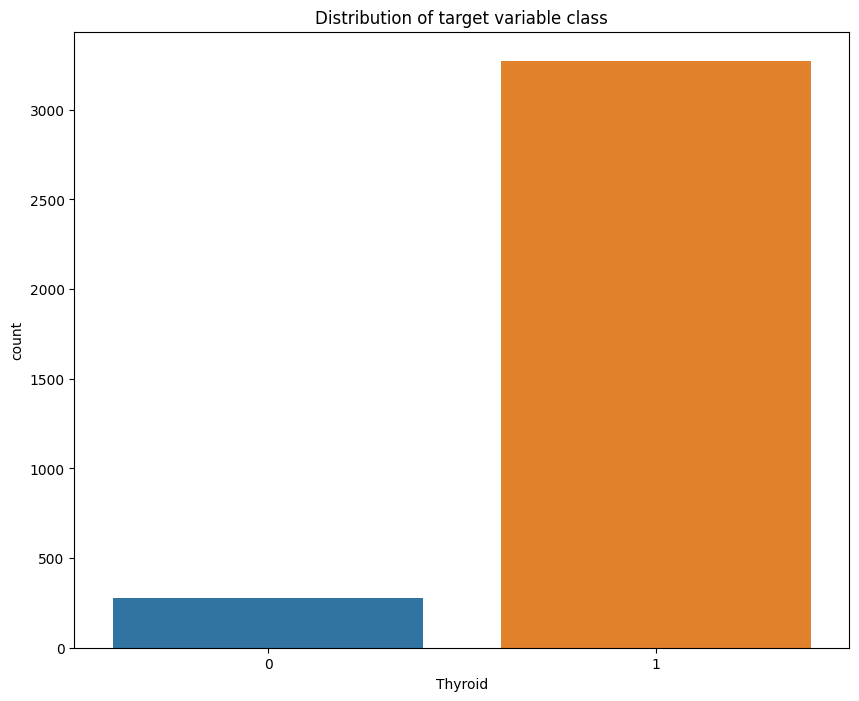

In [26]:
#checking the distribution of target Feature
sns.countplot(x= data3.Thyroid,data=data3)
plt.title('Distribution of target variable class')


In [27]:
data3.Thyroid.value_counts()

1    3272
0     280
Name: Thyroid, dtype: int64

As The dataset is highly imbalanced , it would be more biased towards `Positive cases`. For the sake of smiplicity , i will down sample the datset a liltle bit.
Another way it to collect more data, which is not possible in this case

In [28]:
from sklearn.utils import resample

negative_sample = data3[data3.Thyroid == 0]
positive_sample = data3[data3.Thyroid == 1]
positive_downsample = resample(positive_sample,
             replace=True,
             n_samples=len(negative_sample)+100,
             random_state=42)
data4_downsampled = pd.concat([positive_downsample,negative_sample])

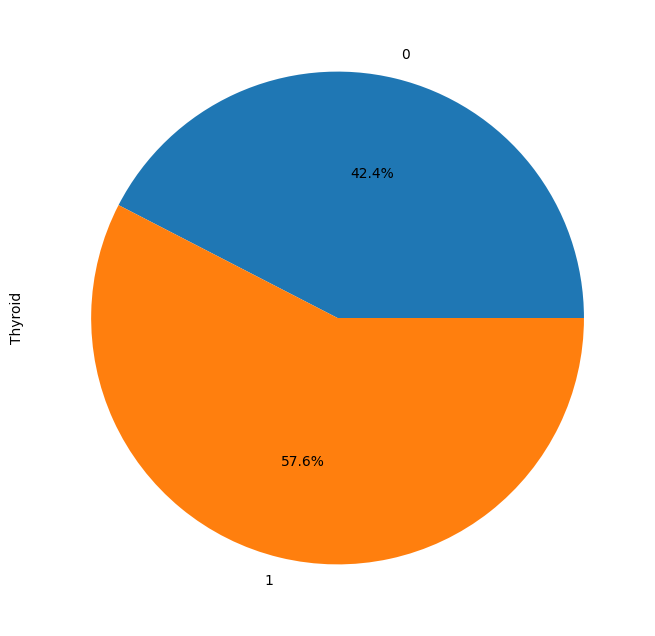

In [29]:
data4_downsampled.groupby('Thyroid').size().plot(kind='pie',
                                       y = "Thyroid",
                                       label = "Thyroid",
                                       autopct='%1.1f%%')
data4 =data4_downsampled.copy()

<Axes: xlabel='Thyroid', ylabel='age'>

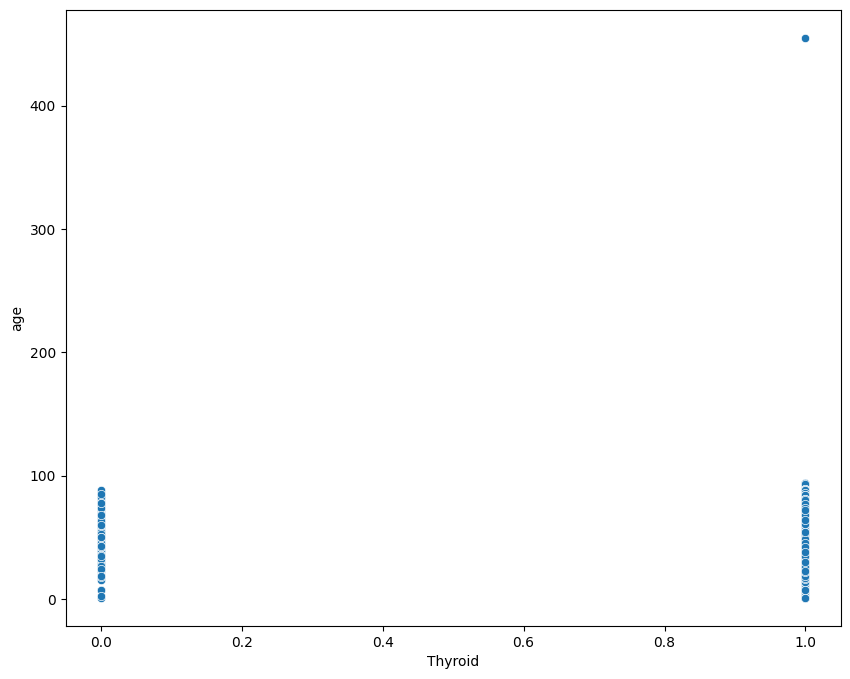

In [30]:
#how does the age affects the thyroiod
sns.scatterplot(y=data3.age,x=data3.Thyroid)

As we can see the there is one outlier present as persons age cannot be 455 , so we will drop these feature

In [31]:
data3[data3.age >=100]

,age,sex,on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,lithium,goitre,tumor,hypopituitary,psych,TSH,T3,TT4,T4U,FTI,Thyroid
1364,455,1,0,0,0,0,0,0,0,0,0,0,0,1.1,2.0,118.0,1.13,104.0,1


In [32]:
data3 =data3[data3.age <=100]

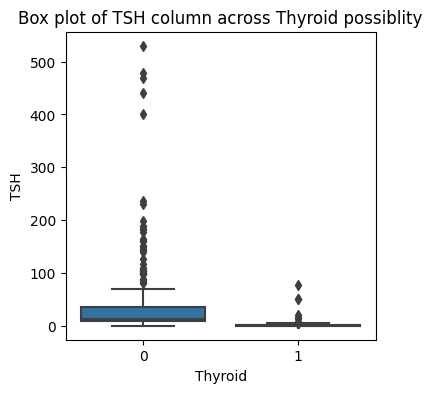

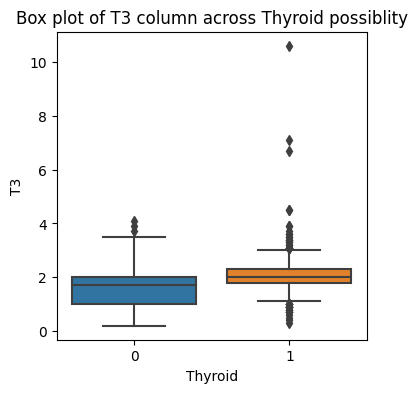

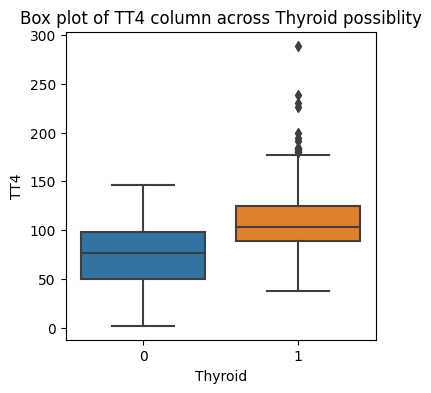

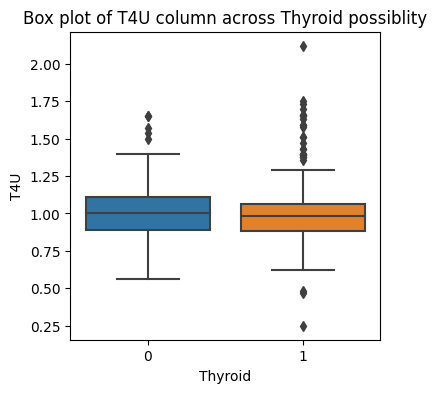

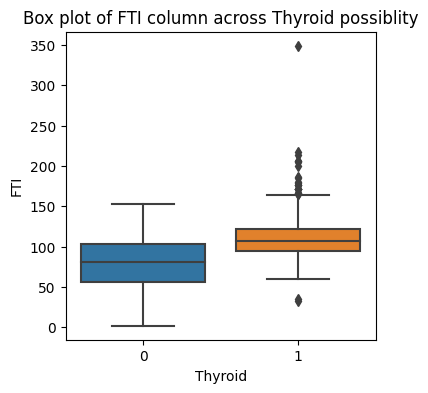

In [33]:
numeric_col = ["TSH","T3","TT4","T4U","FTI"]
for col in numeric_col:
    plt.figure(figsize = (4,4))
    sns.boxplot(x='Thyroid',y=col,data=data4)
    plt.title(f'Box plot of {col} column across Thyroid possiblity')


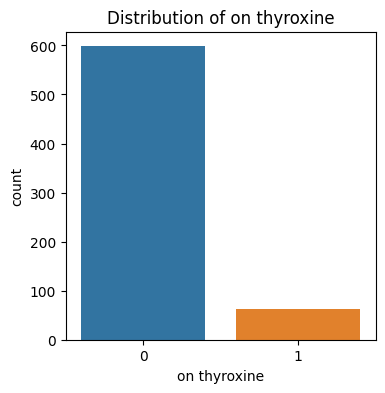

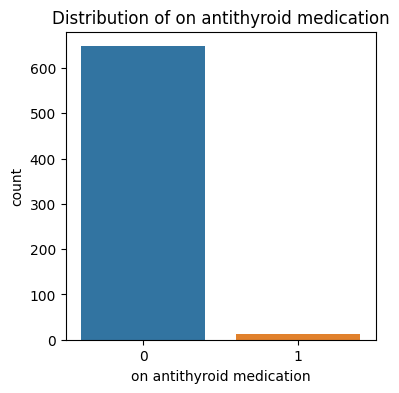

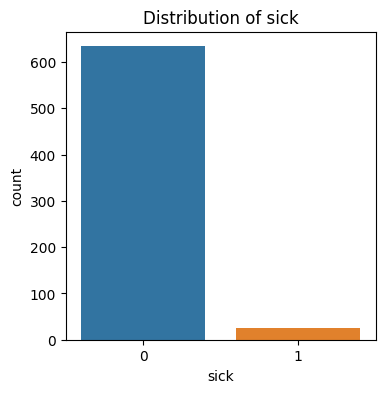

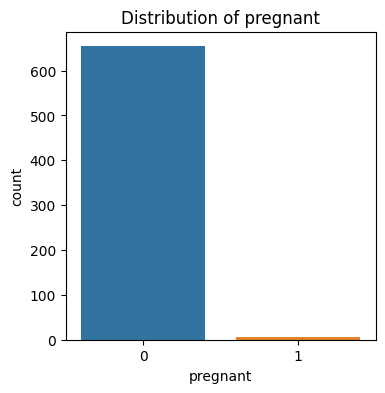

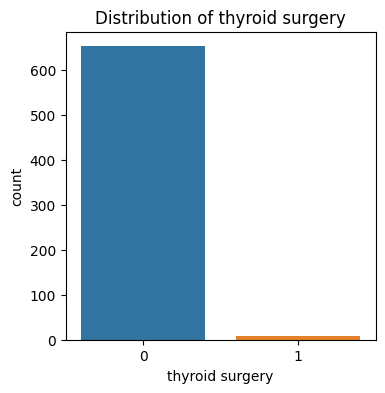

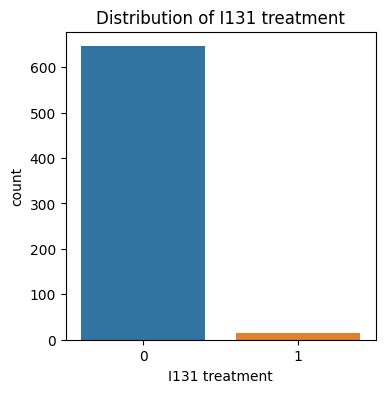

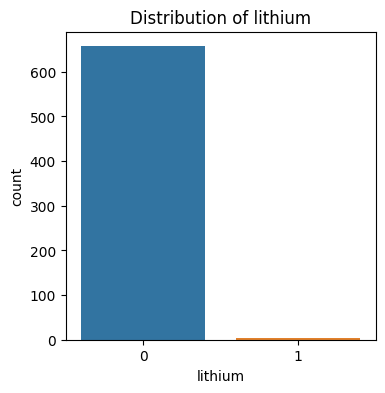

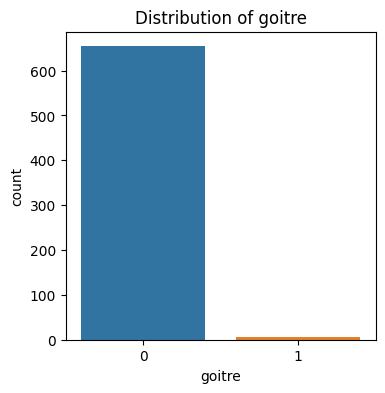

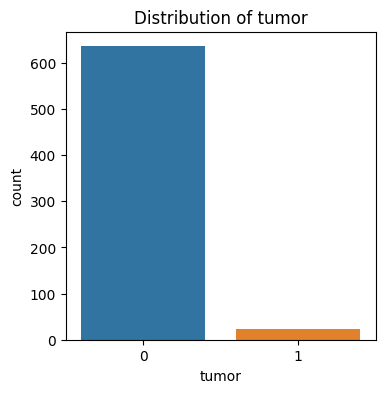

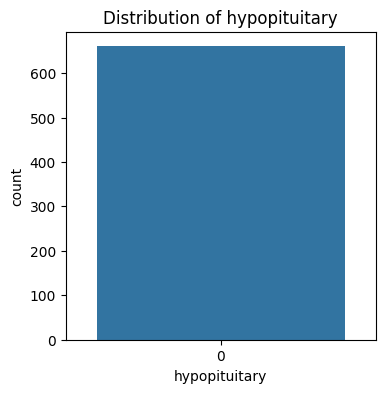

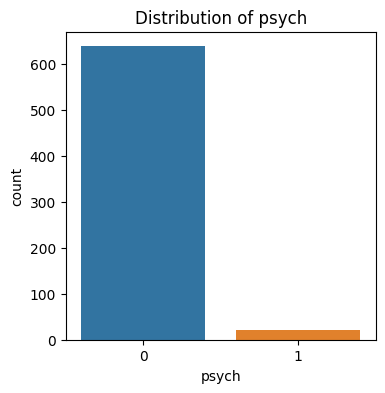

In [34]:
for col in col_t_f_values:
       plt.figure(figsize = (4,4))
       sns.countplot(x=data4[col],data=data4)
       plt.title(f'Distribution of {col}')
       
   

<Axes: >

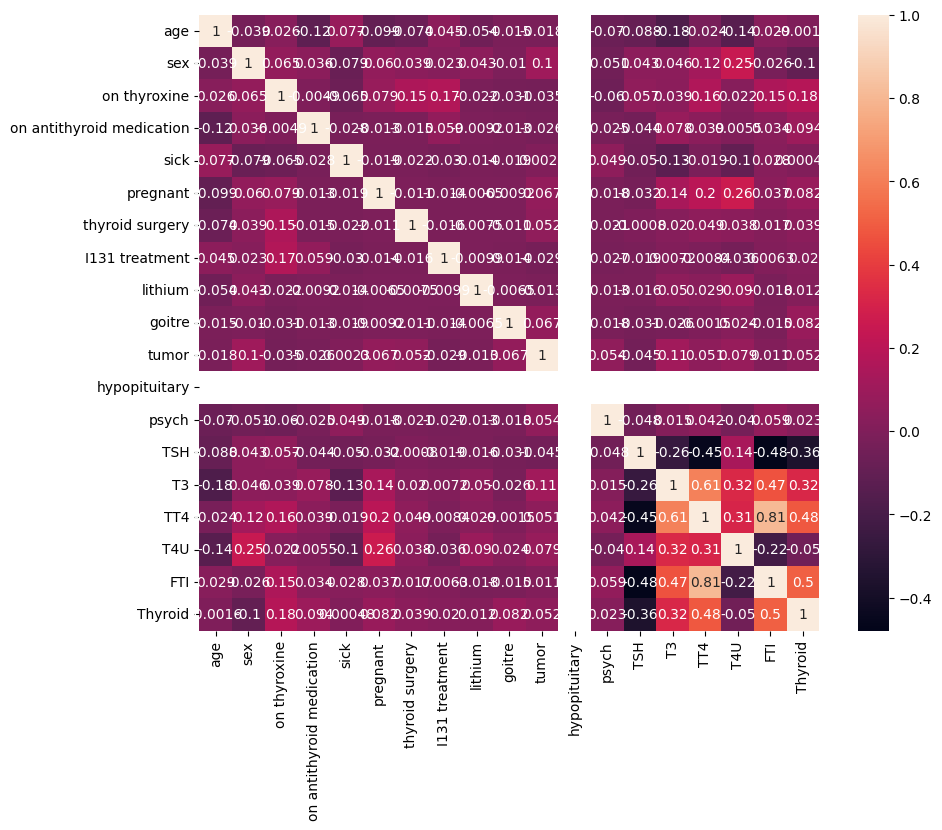

In [35]:
#plotting the correalation matrix to see the correalation between the target variable
sns.heatmap(data4.corr(),annot=True)

In [36]:
data4.columns

Index(['age', 'sex', 'on thyroxine', 'on antithyroid medication', 'sick',
       'pregnant', 'thyroid surgery', 'I131 treatment', 'lithium', 'goitre',
       'tumor', 'hypopituitary', 'psych', 'TSH', 'T3', 'TT4', 'T4U', 'FTI',
       'Thyroid'],
      dtype='object')

According to the correlation matrix , most of the features are not even that highly correalted and as seen earlier shows severse case of class imblancing. So we will remove those features


In [37]:
feature_to_remove = ['hypopituitary','age','sick','lithium']
data5 = data3.drop(columns = feature_to_remove,axis=1)

## <font color='green'>Model Selection and Evalulation<font><a class='anchor' id='model'>

In [38]:
X = data5.drop(columns=['Thyroid'],axis=1)
y = data5['Thyroid']

In [39]:
#Splitting the data into Training and test test
X_train, X_test,y_train, y_test = train_test_split(X,y, test_size=0.2,random_state=42)

In [40]:
X_train.shape, X_test.shape

((2840, 14), (711, 14))

#### <font  color='blue'>Logistic regression  with Hyperparameter tuning and cross validation</font>

In [41]:
#hyperparameter tunning will look for best parameters for your model
parameters = {'max_iter':[100,200,500]}
lr_classifier = LogisticRegression()

#training model based on different batches(Kfold method)(cross validating)
lr_classifier_rs = RandomizedSearchCV(lr_classifier,param_distributions=parameters, cv=4,random_state=42)
lr_classifier_rs.fit(X_train,y_train)
y_pred_lr=lr_classifier_rs.predict(X_test)

In [43]:
#function for plotting confusion matrix
def plt_confusionMatrix(cm,label):
    fig,ax=plt.subplots()
    im = ax.imshow(cm,interpolation='nearest',cmap=plt.cm.Blues)
    ax.figure.colorbar(im,ax=ax)
    ax.set(xticks=np.arange(cm.shape[1]),
    yticks=np.arange(cm.shape[0]),
    xticklabels=label, yticklabels=label,
    ylabel='True label',
    xlabel='Predicted label')
    plt.xticks(rotation = 90)
    thresh = cm.max() / 2
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, int(cm[i, j]),ha="center", va="center",color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    

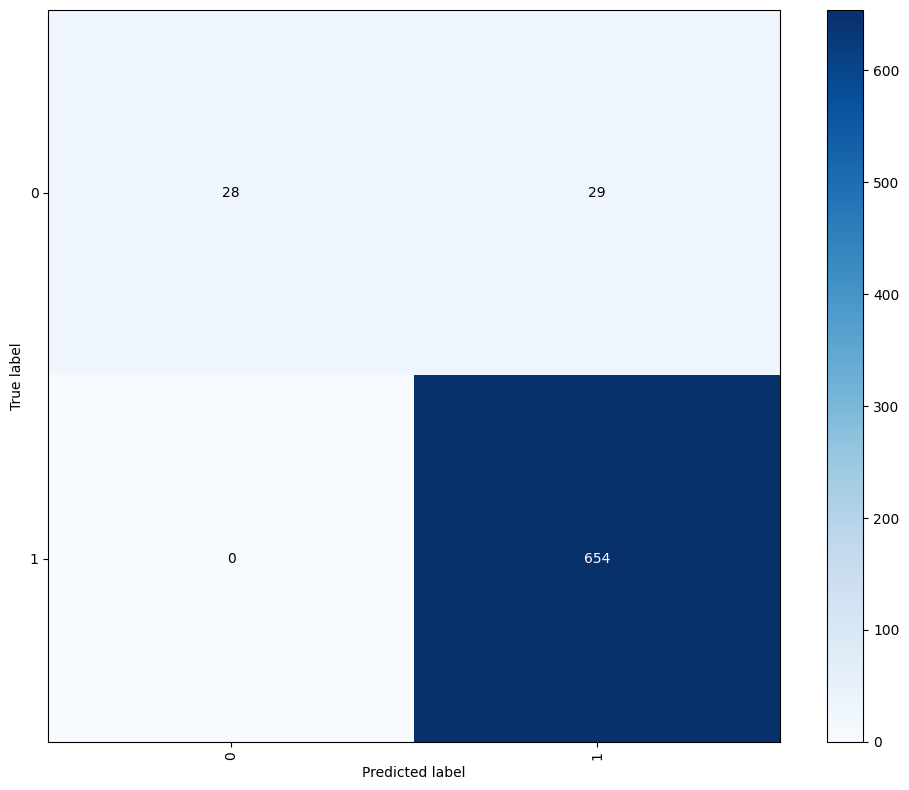

In [44]:
cm=confusion_matrix(y_test.values,y_pred_lr)
plt_confusionMatrix(cm,np.unique(y_pred_lr))

In [45]:
#function to get the best random search parameters
def get_best_parma(model):
    print('Best set of parameteres : ',model.best_params_)

In [46]:
get_best_parma(lr_classifier_rs)


Best set of parameteres :  {'max_iter': 100}


#### <font color='blue'>SVM model with Hyperparameter tuning and cross validation</font>

In [47]:
#defing parameteres
parameters = {'kernel':['linear','rbf','poly','sigmoid'],
              }
svm_rs = RandomizedSearchCV(SVC(),param_distributions=parameters,cv=4,random_state=42)
svm_rs.fit(X_train,y_train)

RandomizedSearchCV(cv=4, estimator=SVC(),
                   param_distributions={'C': [100, 50],
                                        'kernel': ['linear', 'rbf', 'poly',
                                                   'sigmoid']},
                   random_state=42)

In [48]:
y_pred_svm = svm_rs.predict(X_test)

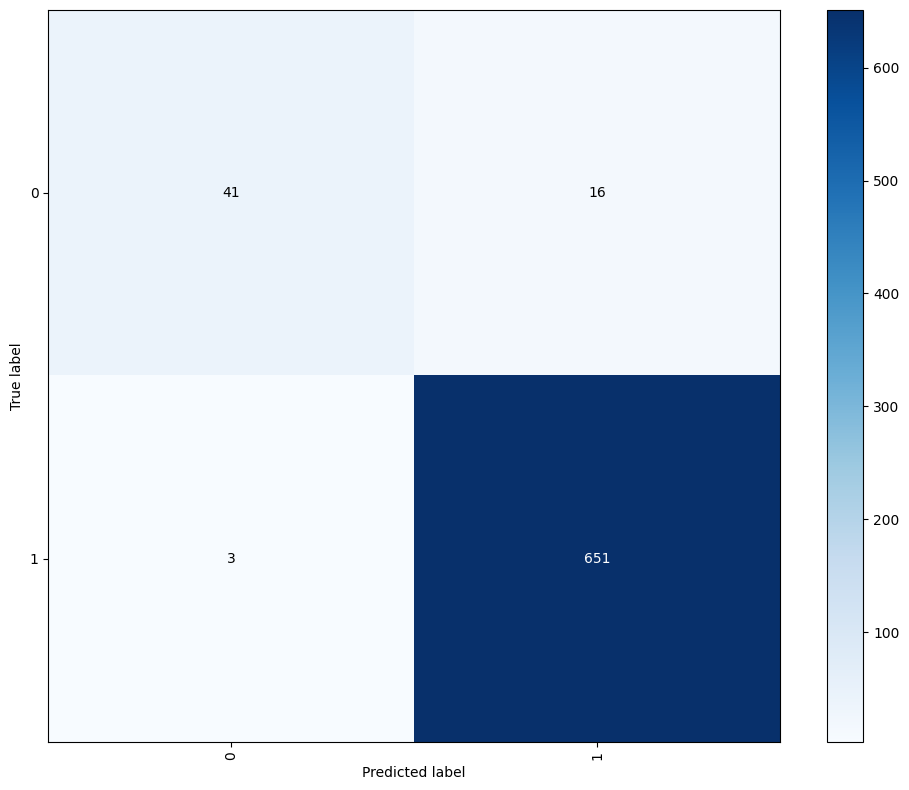

In [50]:
cm=confusion_matrix(y_test.values,y_pred_svm)
plt_confusionMatrix(cm,np.unique(y_pred_svm))

In [51]:
get_best_parma(svm_rs)

Best set of parameteres :  {'kernel': 'linear', 'C': 100}


#### <font color='blue'>Decision Tree Model with Hyperparameter tuning and cross validation</font>

In [52]:
parameters = {'max_depth':np.arange(2,16,2)}

dt_classifier = DecisionTreeClassifier()
dt_classifier_rs = RandomizedSearchCV(dt_classifier, param_distributions = parameters, random_state = 42)
dt_classifier_rs.fit(X_train, y_train)

RandomizedSearchCV(estimator=DecisionTreeClassifier(),
                   param_distributions={'max_depth': array([ 2,  4,  6,  8, 10, 12, 14])},
                   random_state=42)

In [53]:
get_best_parma(dt_classifier_rs)

Best set of parameteres :  {'max_depth': 4}


In [54]:
y_pred_dt = dt_classifier_rs.predict(X_test)

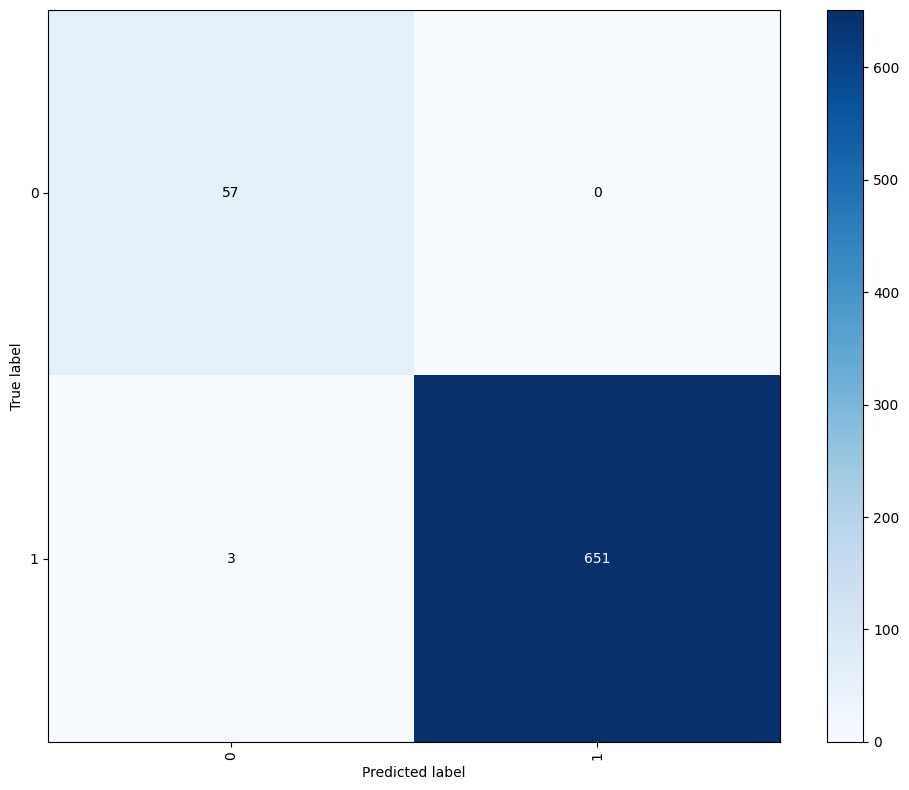

In [56]:
cm = confusion_matrix(y_true=y_test.values,y_pred=y_pred_dt)
plt_confusionMatrix(cm,np.unique(y_pred_dt))

#### <font color='blue'>Random Forest with Hyperparameter tuning and cross validation</font>

In [57]:
parameters = {
    'n_estimators':np.arange( 20,80, 10), 
    'max_depth': np.arange(2, 8, 2)
}
rf_classifier = RandomForestClassifier()
rf_classifier_rs = RandomizedSearchCV(rf_classifier,param_distributions=parameters,random_state = 42)
rf_classifier_rs.fit(X_train, y_train)

RandomizedSearchCV(estimator=RandomForestClassifier(),
                   param_distributions={'max_depth': array([2, 4, 6]),
                                        'n_estimators': array([20, 30, 40, 50, 60, 70])},
                   random_state=42)

In [58]:
get_best_parma(rf_classifier_rs)

Best set of parameteres :  {'n_estimators': 30, 'max_depth': 6}


In [59]:
y_pred_rf = rf_classifier_rs.predict(X_test)

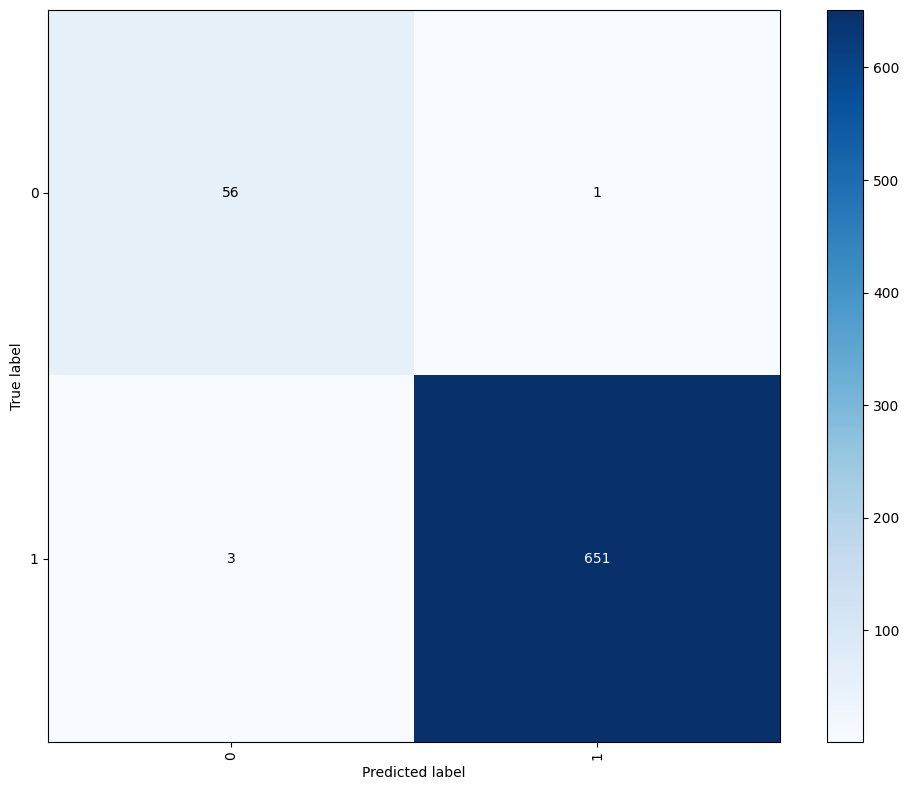

In [60]:
cm = confusion_matrix(y_true=y_test.values,y_pred=y_pred_rf)
plt_confusionMatrix(cm,np.unique(y_pred_rf))

In [49]:
svm_acc = accuracy_score(y_true=y_test,y_pred=y_pred_svm)
print('Accuracy using Support Vector Machine: ',svm_acc)

Accuracy using Support Vector Machine:  0.9732770745428974


In [55]:
dt_acc = accuracy_score(y_true=y_test,y_pred=y_pred_dt)
print('Accuracy using Decision tree: ',dt_acc)

Accuracy using Support Vector Machine:  0.9957805907172996


In [61]:
rf_acc = accuracy_score(y_true=y_test,y_pred=y_pred_rf)
print('Accuracy using Random Forest Machine: ',rf_acc)

Accuracy using Support Vector Machine:  0.9943741209563994


In [42]:
lr_acc = accuracy_score(y_true=y_test,y_pred=y_pred_lr)
print('Accuracy using Logistic Regression: ',lr_acc)

Accuracy using Logistic Regression:  0.9592123769338959


Lets check for classification report

In [62]:
print('LogisticRegression Model')
print(classification_report(y_true=y_test,y_pred=y_pred_lr))
print('--------------------------------------------------------')
print('Random Forest Machine')
print(classification_report(y_true=y_test,y_pred=y_pred_rf))
print('--------------------------------------------------------')
print('Decision tree Model')
print(classification_report(y_true=y_test,y_pred=y_pred_dt))
print('--------------------------------------------------------')
print('Support Vector Machine Model')
print(classification_report(y_true=y_test,y_pred=y_pred_svm))
print('--------------------------------------------------------')


LogisticRegression Model
              precision    recall  f1-score   support

           0       1.00      0.49      0.66        57
           1       0.96      1.00      0.98       654

    accuracy                           0.96       711
   macro avg       0.98      0.75      0.82       711
weighted avg       0.96      0.96      0.95       711

--------------------------------------------------------
Random Forest Machine
              precision    recall  f1-score   support

           0       0.95      0.98      0.97        57
           1       1.00      1.00      1.00       654

    accuracy                           0.99       711
   macro avg       0.97      0.99      0.98       711
weighted avg       0.99      0.99      0.99       711

--------------------------------------------------------
Decision tree Model
              precision    recall  f1-score   support

           0       0.95      1.00      0.97        57
           1       1.00      1.00      1.00       654

 

AS we can afford to have False Negative, thus checking the recall score
### Selecting `Decision tree`  as the best model

In [63]:
#saving the model
import pickle

with open('model.pickle','wb') as f :
    pickle.dump(dt_classifier_rs,f)